<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Gradient Descent Lab

_Authors: Ben Shaver (DC), h/t Matt Brems (DC)_

### Learning Objectives:
- Review the basics of linear regression
- Implement gradient descent by scratch to fit a simple linear regression model
- Practice basic layered plots in Matplotlib

---


## Introduction and preliminaries

In this lab, we'll examine some (completely made up) data in order to fit a model that predicts a GA grad's salary as a function of their number of years of pre-GA professional experience. First, you'll guess at the relationship between those two variables, and then we'll implement gradient descent from scratch in order to iteratively improve our guess until we end up with a well-fitted model.

(You may find that [this article](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/) helps you understand gradient descent. Reading through it *may* be a good decision before you complete this lab, though it should not be necessary.)

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# testing this here
import matplotlib.lines as lines

%matplotlib inline

#### Write a Python function that predicts a student's post-GA income based on their number of years of previous experience:
It should take years of experience, an intercept _b_, and a slope _m_ as arguments. (In simple linear regression, we call the y-intercept $\beta_0$ and the slope $\beta_1$, but we'll use $b$ and $m$ for ease.) It will return the post-GA income.

y = mx + b

In [4]:
def income(y_exp, m, b):
    '''
    y_exp: years of experience
    m: extra dollars per year of exp
    b: salary with no experience (intercept)
    '''
    return m*y_exp + b

In [9]:
income(3, 2000, 15000)

21000

Below, we've provided 100 hypothetical graduates with varying years of experience. Run this cell to save this as `years_exp`.

In [7]:
years_exp = pd.read_pickle('data.pickle')['Years of Experience']

How much do **you** think a GA grad makes if they have no prior experience? How much do **you** think an additional year of experience adds to the post-GA salary? Using the function you wrote above and the years of experience for 100 hypothetical graduates provided, generate 100 predictions based on your assumptions.

In [37]:
preds = {'yoe': years_exp, 'preds': []}
for student in years_exp:
    preds['preds'].append(income(student, 500, 15000))
df_pred = pd.DataFrame(preds)

#### Now, load in the rest of the pickled dataframe, and run the following cell to visualize the observed relationship between years of experience and post-GA income:

(For more information on Pandas' `to_pickle` and `read_pickle` methods, refer to the documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_pickle.html). Mmmm pickles.)

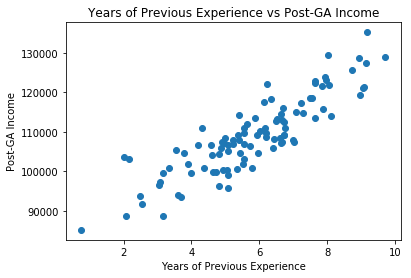

In [25]:
income_data = pd.read_pickle('data.pickle')

plt.scatter(income_data['Years of Experience'], income_data['Post-GA Income'])
plt.title('Years of Previous Experience vs Post-GA Income')
plt.xlabel('Years of Previous Experience')
plt.ylabel('Post-GA Income');

#### Duplicate the scatter plot above, but with *your* predictions plotted as a red line.

How close were you?

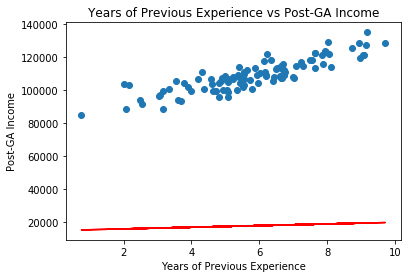

In [38]:
income_data = pd.read_pickle('data.pickle')

plt.scatter(income_data['Years of Experience'], income_data['Post-GA Income'])
# make America GREAT again
plt.plot(df_pred['yoe'], df_pred['preds'], color='red', linestyle='solid')
plt.title('Years of Previous Experience vs Post-GA Income')
plt.xlabel('Years of Previous Experience')
plt.ylabel('Post-GA Income');
plt.show()

#### In the context of linear regression, what does the following function compute? Rename the function appropriately.

In [39]:
def mse(y_true, y_pred):
    '''
    calcs mean squared error
    '''
    n = len(y_true)
    se = [(y_true[i] - y_pred[i])**2 for i in range(n)]
    return(np.sum(se)/n)

#### The function above is just one of many functions we use for a certain purpose. In machine learning, what do we call these type of functions?

Loss functions

## Gradient Descent

We use gradient descent to find the set of parameter values that minimizes some function. Let's say we want to minimize this function:

<img src='img1.png'>

The parameters of a simple linear regression model are $m$ and $b$. In `statsmodels` and `scikit-learn`, when we run `.fit()`, we are estimating the value of these parameters by identifying a best guess. (Equivalently, we find the **best fit line** by finding the values of $m$ and $b$ that minimize the sum of squared errors.)

In *ordinary least squares regression*, we can directly find the values of $m$ and $b$ that minimize SSE by solving $\hat{\beta} = (X^TX)^{-1}X^Ty$. 

However, there are a lot of machine learning techniques that can't be optimized in such a simple way. They rely on **gradient descent** as one method of estimating values of the parameters.

Let's walk through an example together of using gradient descent to estimate parameters of a linear regression model.

**Question:** Trying to use as little mathematical terminology as possible, how would you describe a loss function?

**Answer:** MSE (see above) - 'how far off you are' h/t Evan h/t Eddie (comic relief)

**Question:** We plot our loss function for all possible values of our parameters $m$ and $b$. Our goal is to find the values of $m$ and $b$ that {blank} our loss function. 

**What goes in the blank above?** Minimize

Given the loss function above, we take the partial derivative of this function with respect to $m$ and $b$. We've done the math for you. Here is the result:
<img src='img2.png'>

#### Write two functions:
- The first function, `partial_derivative_m`, should take as inputs a list of $x$ values, a list of $y$ values, a $b$ value, and an $m$ value. *It should return how much the loss function changes for a one-unit change in $m$.*
- The second function, `partial_derivative_b`, should take as inputs a list of $x$ values, a list of $y$ values, a $b$ value, and an $m$ value. *It should return how much the loss function changes for a one-unit change in $b$.*

In [42]:
def partial_derivative_m(x, y, b, m):
    '''
    x: list
    y: list
    b: y-intercept, value
    m: slope, value
    returns: how much loss function changes for one-unit change in m
    '''
    totes = 0.0
    for i, j in zip(x,y):
        totes += -i*(j-(m*i+b))
    return (2/len(x)*totes)

In [96]:
partial_derivative_m(df_pred['yoe'], df_pred['preds'], 15000, -7363)

-578982.7071285709

In [50]:
def partial_derivative_b(x, y, b, m):
    '''
    x: list
    y: list
    b: y-intercept, value
    m: slope, value
    returns: how much loss function changes for one-unit change in b
    '''
    totes = 0.0
    for i, j in zip(x,y):
        totes += -1*(j-(m*i+b))
    return (2/len(x)*totes)

In [57]:
# note that our 'target' intercept is $15,000 with a slope of $500/yr
partial_derivative_b(df_pred['yoe'], df_pred['preds'], 16000, 500)

2000.0

#### In your own words, what do these partial derivative functions represent, and how are they relevant in gradient descent?

**Answer:** The two functions represent the loss incurred from incorrect slopes (m) and intercepts (b) compared to our input (target) x and y lists. They are relevant because we are seeking to minimize these values to zero to fit the 'model'.

#### Now that you've answered that question, it's time to actually implement gradient descent! 

You might find this formula helpful:
$$
\beta_1 := \beta_1 - \alpha \frac{\partial L}{\partial \beta_1}
$$

First, write a function called `take_step` that will improve our model fit by taking a single step. It will take five inputs:

- A list of x values
- A list of y values
- A current b value
- A current m value
- A learning rate

It will return two outputs:
- A new b value
- A new m value

*(Hint: Your function should make use of the two functions you just wrote!)*

In [62]:
def take_step(x, y, b, m, a=0.0001):
    '''
    x: list
    y: list
    b: value, current intercept
    m: value, current slope
    a: alpha value, rate o' larnin' (default 0.0001)
    '''
    new_b = b - a * partial_derivative_b(x, y, b, m)
    new_m = m - a * partial_derivative_m(x, y, b, m)
    return new_b, new_m

In [63]:
take_step(df_pred['yoe'], df_pred['preds'], 50000, 500)

(43000.0, -40046.14875648271)

#### Now, define a function that will keep on taking steps until the function is minimized.

You will need to decide on a *stopping criterion*. This could be a finite number of iterations you want your gradient descent to run, or it could be some special condition which causes your loop to end. Choose a stopping criterion, and defend your choice. (You may want to try out a few different stopping criteria.)

In [109]:
 def gd_it(x, y, b, m, a=0.0001, n=10):
        '''
        x: list
        y: list
        b: value, current intercept
        m: value, current slope
        a: alpha value, rate o' larnin' (default 0.0001)
        n: number of iterations we want (default 10)
        '''
        # this is our first step (1)
        b_step, m_step = take_step(x, y, b, m, a)
        
        # these are our next steps (2-10)
        for i in range(n-1):
            b_step, m_step = take_step(x, y, b_step, m_step, a)
#             print(take_step(x, y, b_step, m_step, a)) 
        print(take_step(x, y, b_step, m_step, a)) 

In [112]:
gd_it(df_pred['yoe'], df_pred['preds'], 15500, 400, a=0.0001, n=50000)

(15211.755320885079, 466.60658026850166)


#### Run your gradient descent function to move from your first guess to what the true values of _m_ and _b_ are, and plot a line showing the best model that gradient descent found:

#### Import `statsmodels` and fit an OLS model with your data. Compare your results to what you found above.

## Visualization Prompt:

Modify the function you've just written so that you save all the intermediate *b* and *m* values. Plot the same scatter plot, but with a line showing the models gradient descent found before convergence. Use a small `alpha` to make your lines semi-transparent, and experiment so your audience can see the route your gradient descent took before it settled on the best model.

To get you started, here is some Python code you might use as a template:

```python
plt.scatter(...                 # Plot the data 
plt.title(...                   # Add a title
plt.xlabel(...                  # Add axis
plt.ylabel(...                  #     labels
plt.plot(...                    # Plot your first guess
for i in range(...)):           # Iterate through for each iteration, optionally using `step` to skip some
    preds = make_preds(...      # Make prediction using your current b and m values
    plt.plot(..., alpha=...     # Plot the intermediate model with a transparent line
plt.plot(...                    # Plot the final best model
```

## Bonus Questions:

- Build on your function to implement stochastic gradient descent.
- Wrap the above functions into a class that can implement both types of gradient descent.
- Use the in-class slides to build out functions that can implement gradient descent for **logistic regression**.